## **DBSCAN Clustering Algorithm**


##### **Import Libraries**


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style("darkgrid")

##### **Generate and Visualize Data**

In [3]:
from sklearn.datasets import make_blobs

data_points, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.5, random_state=0)

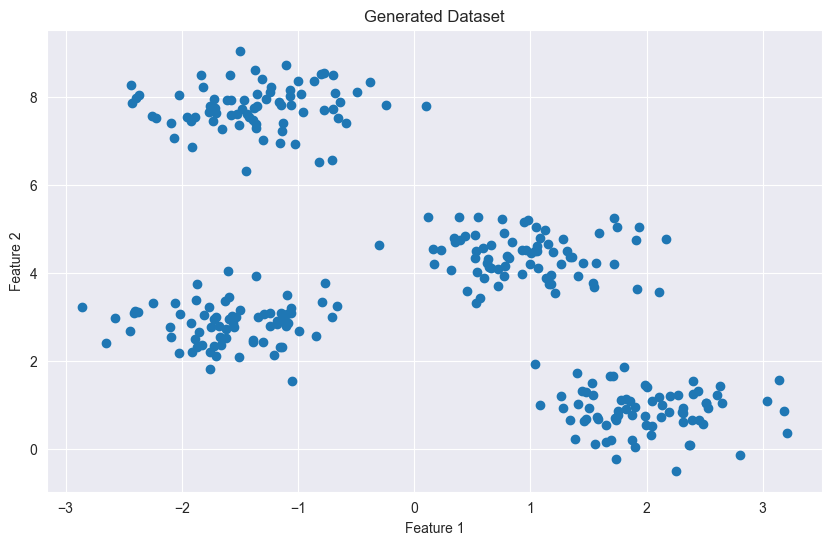

In [4]:
plt.figure(figsize=(10, 6))
plt.scatter(x=data_points[:, 0], y=data_points[:, 1])
plt.title("Generated Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

##### **Compute Nearest Neighbors Distances for `eps` Selection**


In [5]:
from sklearn.neighbors import NearestNeighbors

nearest_neighbors = NearestNeighbors(n_neighbors=2)
nearest_neighbors.fit(data_points)

distances, indices = nearest_neighbors.kneighbors(data_points)

In [6]:
distances = np.sort(distances, axis=0)
# Focus on the distance to the second nearest neighbor
second_neighbor_distances = distances[:, 1]

##### **Plot the K-Distance Graph to Determine eps**

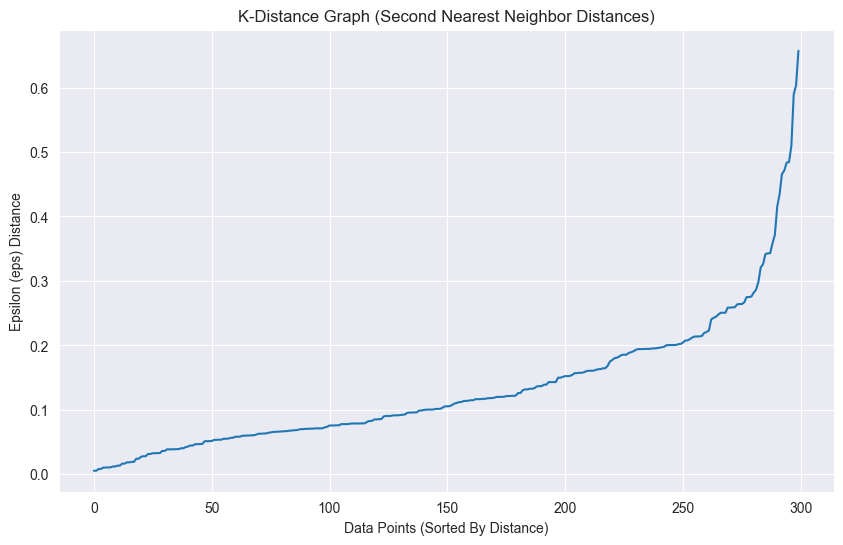

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(second_neighbor_distances)
plt.title("K-Distance Graph (Second Nearest Neighbor Distances)")
plt.xlabel("Data Points (Sorted By Distance)")
plt.ylabel("Epsilon (eps) Distance")
plt.show()

# Visually inspect the graph to select an appropriate `eps`
# Look for the "elbow" point where distances start to increase rapidly

##### **Apply DBSCAN Clustering Algorithm**

In [8]:
from sklearn.cluster import DBSCAN

dbscan_model = DBSCAN(eps=0.4, min_samples=5, metric="euclidean")
dbscan_model.fit(data_points)

DBSCAN(eps=0.4)

In [9]:
cluster_labels_df = pd.DataFrame(dbscan_model.labels_, columns=["Cluster_Labels"])
cluster_labels_df.head()

,Cluster_Labels
0,-1
1,0
2,1
3,0
4,3


##### **Analyze Clustering Results**

In [10]:
cluster_labels_df.value_counts().sort_index()

Cluster_Labels
-1                20
 0                69
 1                72
 2                71
 3                68
Name: count, dtype: int64

In [11]:
num_clusters = cluster_labels_df[cluster_labels_df != -1].value_counts().count()
print(f"Number of clusters (excluding noise): {num_clusters}")

Number of clusters (excluding noise): 4


##### **Evaluate the Clustering Using Silhouette Score**

In [12]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(data_points, cluster_labels_df.values.ravel())
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.6645263453310377


##### **Visualize the DBSCAN Clustering Results**

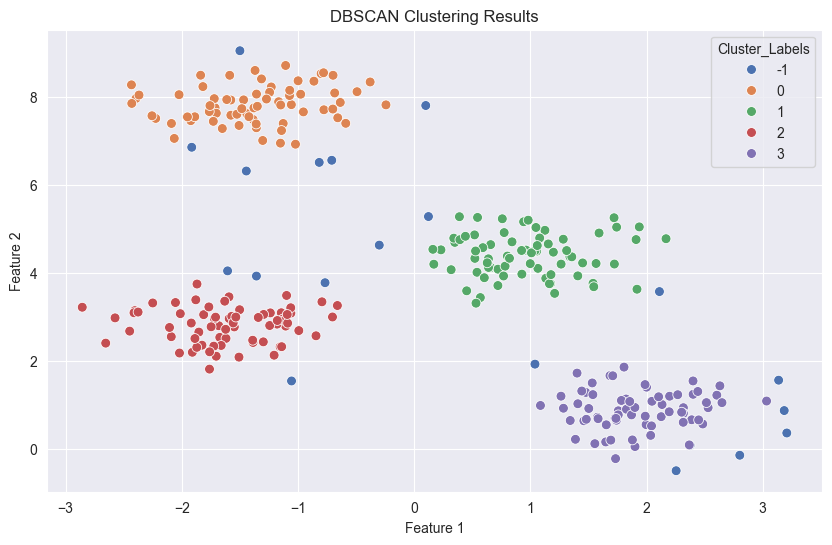

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=data_points[:, 0],
    y=data_points[:, 1],
    hue=cluster_labels_df["Cluster_Labels"],
    palette="deep",
    s=50,
)
plt.title("DBSCAN Clustering Results")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

---

In DBSCAN (Density-Based Spatial Clustering of Applications with Noise), the data points are categorized into three types:

1. **Core Points**:
   - **Definition**: These are the points that are within a defined distance (`eps`) from at least a minimum number of other points (`min_samples`). They are central to forming clusters.
   - **Characteristics**: They have many neighbors and form the dense parts of the clusters.

2. **Border Points**:
   - **Definition**: These are points that are within the `eps` distance of a core point but do not have enough neighbors themselves to be considered core points.
   - **Characteristics**: They lie on the edges of the clusters and connect the core points to each other.

3. **Noise Points (Outliers)**:
   - **Definition**: These are points that do not meet the criteria to be classified as either core or border points. They are isolated from the dense clusters.
   - **Characteristics**: They are not part of any cluster and are considered as outliers or noise.

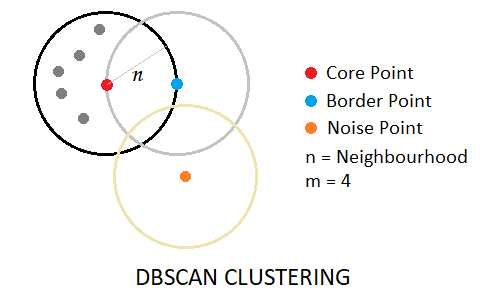

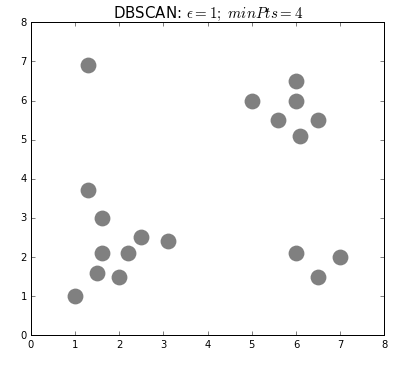